In [1]:
import os 
import sys
sys.path.append("../galess")
import lens_stat as ls
import ls_utils as utils
import lens_plot
import HOD

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
h = 0.7

/Users/giofer/anaconda3/envs/hmf/lib/python3.12/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


In [8]:
if(0):
    z = 1.7
    M_sat, M_min, sigma_logM, alpha = 10**14.18, 10**12.46, 0.2, 1.0
    #M_sat, M_min, sigma_logM, alpha = 10**13.47, 10**12.09, 0.2, 1.0
    #M_sat, M_min, sigma_logM, alpha = 10**12.08, 10**11.16, 0.2, 1.0
    z_array = np.array([1.3, 1.5, 1.7, 1.9, 2.1, 2.3])
    #z_array = np.array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3])
elif(1):
    z = 3.8
    #M_sat, M_min, sigma_logM, alpha = 10**15.25, 10**13.08, 0.2, 1.0
    M_sat, M_min, sigma_logM, alpha = 10**14.80, 10**12.71, 0.2, 1.0
    z_array = np.array([3.4, 3.6, 3.8, 4.0, 4.2, 4.4])
elif(0):
    #random
    z = 4
    M_sat, M_min, sigma_logM, alpha = 2.4e12, 1.6e11, 0.2, 0.5
    z_array = np.array([1.3, 1.5, 1.7, 1.9, 2.1, 2.3])

M_h_array, HMF_array, nu_array, hmf_k, hmf_PS = HOD.init_lookup_table(z)
NTOT = HOD.N_tot(M_h_array, M_sat, alpha, M_min, sigma_logM)
N_g_AVG = HOD.get_AVG_N_tot(M_min, sigma_logM, M_sat, alpha, z)
M_h_AVG = HOD.get_AVG_Host_Halo_Mass(M_min, sigma_logM, M_sat, alpha, z)
b_eff = HOD.get_EFF_gal_bias(M_min, sigma_logM, M_sat, alpha, z)
f_sat = HOD.get_AVG_f_sat(M_min, sigma_logM, M_sat, alpha, z)
n_avg = HOD.get_N_dens_avg(z_array, M_min, sigma_logM, M_sat, alpha)

print(f'redshift z   : {z:.2f}')
print(f'n_avg        : {n_avg:.2e}')
print(f'N_g_AVG      : {N_g_AVG:.2e}')
print(f'log(M_h_AVG) : {np.log10(M_h_AVG):.2f}')
print(f'b_eff        : {b_eff:.2f}')
print(f'log(f_sat)   : {np.log10(f_sat):.2f}')

redshift z   : 3.80
n_avg        : 1.27e-05
N_g_AVG      : 1.04e-06
log(M_h_AVG) : 12.63
b_eff        : 9.23
log(f_sat)   : -2.17


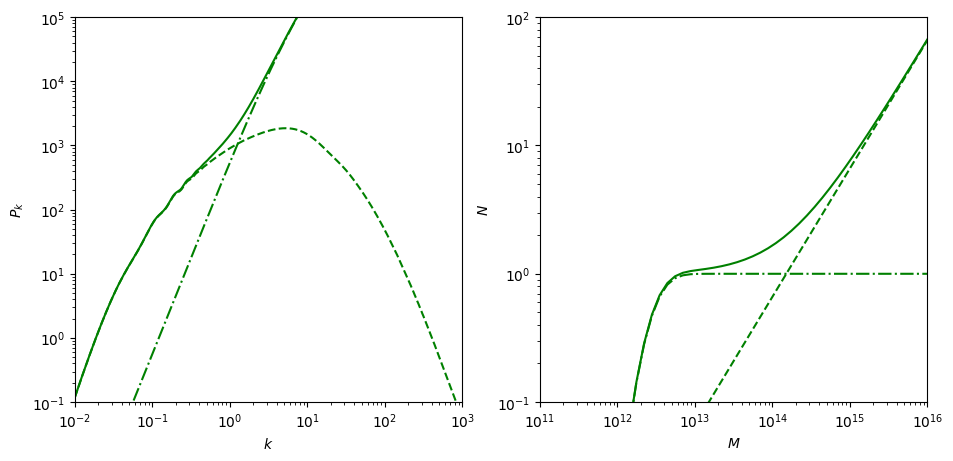

In [4]:
from hmf import MassFunction

z = 0 
USE_MY_PS = 0
hmf = MassFunction(Mmin = 9, Mmax = 17, dlog10m = 0.1, lnk_min = -7.35, lnk_max = 8.6,  dlnk=0.007, z=z, hmf_model = "Behroozi", sigma_8 = 0.828, cosmo_params = {'Om0':0.3, 'H0': 100*h})
hmf_mass = hmf.m*h
hmf_dndm = hmf.dndm/h**4
hmf_nu   = hmf.nu
hmf_k    = hmf.k/h
hmf_PS   = hmf.power*h**3

M_h_array, HMF_array, nu_array, hmf_k, hmf_PS = hmf_mass, hmf_dndm, hmf_nu, hmf_k, hmf_PS
N_G  = HOD.n_g(M_min, sigma_logM, M_sat, alpha, z, M_h_array, HMF_array)
_PS_NORM_ = HOD.norm_power_spectrum()
D_ratio   = (HOD.D_growth_factor(z)/HOD.D_growth_factor(0))**2 if z != 0 else 1
PS_1h_cs, PS_1h_ss, PS_2h = np.zeros(0), np.zeros(0), np.zeros(0)
for k in hmf_k:
    PS_1h_cs = np.append(PS_1h_cs, HOD.PS_1h_cs(k, M_min, sigma_logM, M_sat, alpha, z, M_h_array, HMF_array, N_G))
    PS_1h_ss = np.append(PS_1h_ss, HOD.PS_1h_ss(k, M_min, sigma_logM, M_sat, alpha, z, M_h_array, HMF_array, N_G))
    PS_2h    = np.append(PS_2h, HOD.PS_2h(k, M_min, sigma_logM, M_sat, alpha, z, M_h_array, HMF_array, N_G, nu_array, hmf_k, hmf_PS, D_ratio, _PS_NORM_, USE_MY_PS=USE_MY_PS))
PS_2h = PS_2h*hmf_PS

norm = 4 * np.pi * np.power(hmf_k, 3)

plt.subplots(1, 2, figsize=(11., 5.))
plt.subplot(1, 2, 1)
plt.plot(hmf_k, norm * (PS_1h_cs+PS_1h_ss), 'g-.')
plt.plot(hmf_k, norm * PS_2h, 'g--')
plt.plot(hmf_k, norm * (PS_1h_cs+PS_1h_ss+PS_2h), 'g')
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-1,1e5))
plt.xlim((1e-2,1e3))
plt.ylabel(r'$P_k$')
plt.xlabel(r'$k$')


N_cen = HOD.N_cen(hmf_mass, M_min, sigma_logM)
N_sat = HOD.N_sat(hmf_mass, M_sat, alpha, M_min, sigma_logM)
N_tot = HOD.N_tot(hmf_mass, M_sat, alpha, M_min, sigma_logM)

plt.subplot(1, 2, 2)
plt.plot(hmf_mass, N_cen, 'g-.')
plt.plot(hmf_mass, N_sat, 'g--')
plt.plot(hmf_mass, N_tot, 'g')
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-1,1e2))
plt.xlim((1e11,1e16))
plt.ylabel(r'$N$')
plt.xlabel(r'$M$')
plt.show()

In [9]:
_theta_arcsec = np.logspace(-1,3.333334,14)
theta = _theta_arcsec * 1/206265 # 1 arcsec in rad
omega1h, omega2h = HOD.omega_array(theta, M_min, sigma_logM, M_sat, alpha, z_array, REWRITE_TBLS = False, USE_MY_PS=True)

  0%|          | 0/14 [00:00<?, ?it/s]

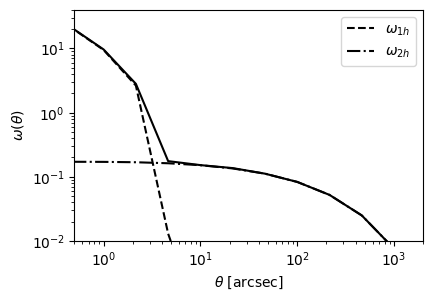

In [17]:
f = 7#2.5e1
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(_theta_arcsec, omega1h*f, 'k--', label=r'$\omega_{1h}$')
ax.plot(_theta_arcsec, omega2h*f, 'k-.', label=r'$\omega_{2h}$')
ax.plot(_theta_arcsec, (omega1h+omega2h)*f, 'k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-3,4e0)) if z < 3.7 else ax.set_ylim((1e-2,4e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

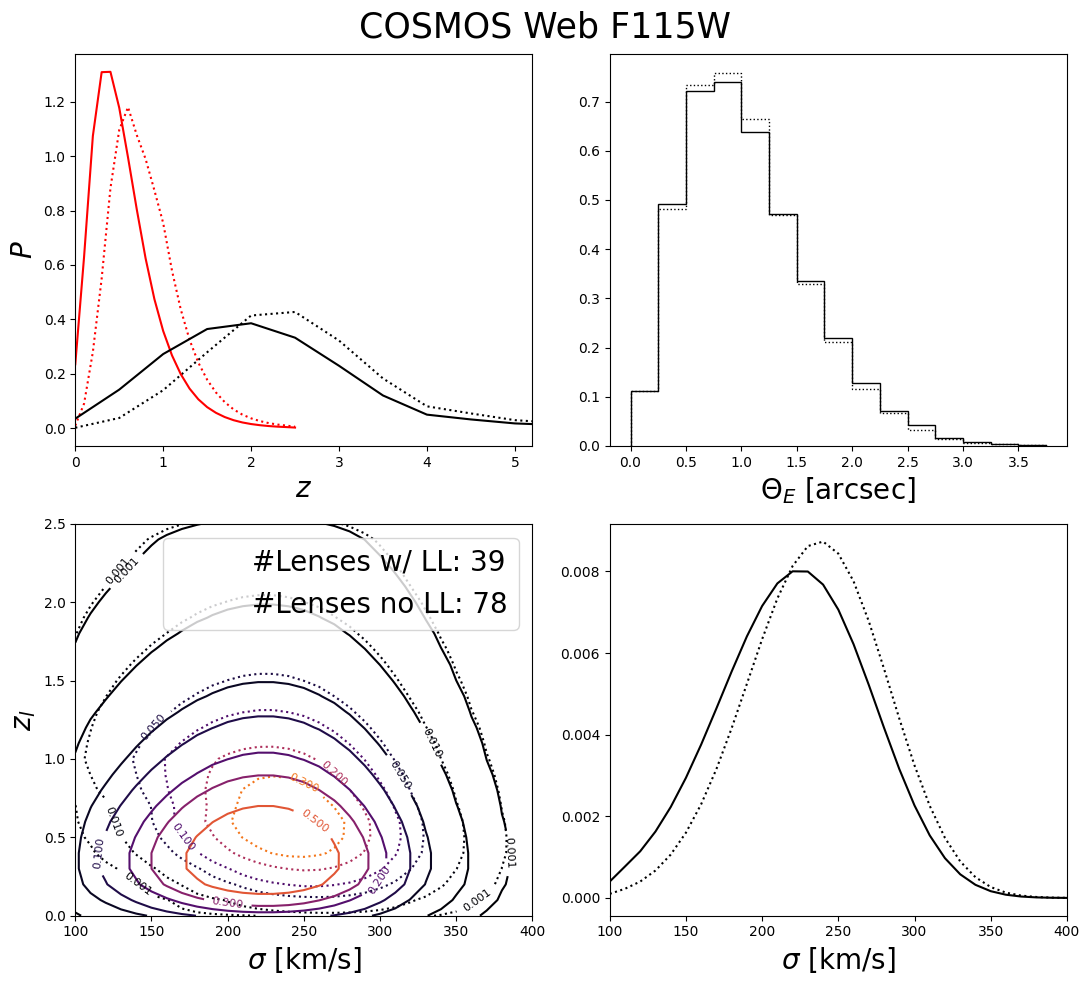

In [5]:
M_array     = np.linspace(-13 , -25 , 25)
sigma_array = np.linspace(100 , 400 , 31)
zl_array    = np.linspace(0.  , 2.5 , 26)
zs_array    = np.linspace(0.  , 10  , 21)
min_SNR     = 20
arc_mu_thr  = 3
#'JADES Deep F115W', 'JADES Deep F150W', 'JADES Deep F277W',
surveys_titles = [
     'COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W', 
     'PEARLS NEP F115W', 'PEARLS NEP F150W', 'PEARLS NEP F277W',
     'COSMOS HST i band',
     'DES i band', 
     'SUBARU HSC SuGOHI i band',
     'EUCLID Wide VIS', 
     'Roman HLWA J', 
     'LSST i band',]

for title in ['COSMOS Web F115W']:#surveys_titles:
     survey_params = utils.read_survey_params(title, VERBOSE = 0)

     limit    = survey_params['limit']
     cut      = survey_params['cut']
     area     = survey_params['area']
     seeing   = survey_params['seeing']
     exp_time_sec = survey_params['exp_time_sec']
     pixel_arcsec = survey_params['pixel_arcsec']
     zero_point_m = survey_params['zero_point_m']
     sky_bckgnd_m = survey_params['sky_bckgnd_m']
     photo_band   = survey_params['photo_band']

     try:
           matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
     except ValueError:
          print('FILE do NOT exist - RUNNING MODEL')
          matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area, 
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m, pixel_arcsec, 
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr, 
                                                                      LENS_LIGHT_FLAG = False, SIE_FLAG = True)

          matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area, 
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m, pixel_arcsec, 
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr, 
                                                                      LENS_LIGHT_FLAG = True, SIE_FLAG = False)

          utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

     _PLOT_FOR_KEYNOTE = 0
     lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = _PLOT_FOR_KEYNOTE)
     fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
     plt.subplots_adjust(wspace=.15, hspace=.2)
     lens_plot.plot_z_sigma_distributions(fig, ax, title, zl_array, zs_array, sigma_array,
                                   Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
                                   PLOT_FOR_KEYNOTE = _PLOT_FOR_KEYNOTE, CONTOUR = 0, 
                                   LOG = 0, SMOOTH = 1, SAVE = 1)

     plt.show()

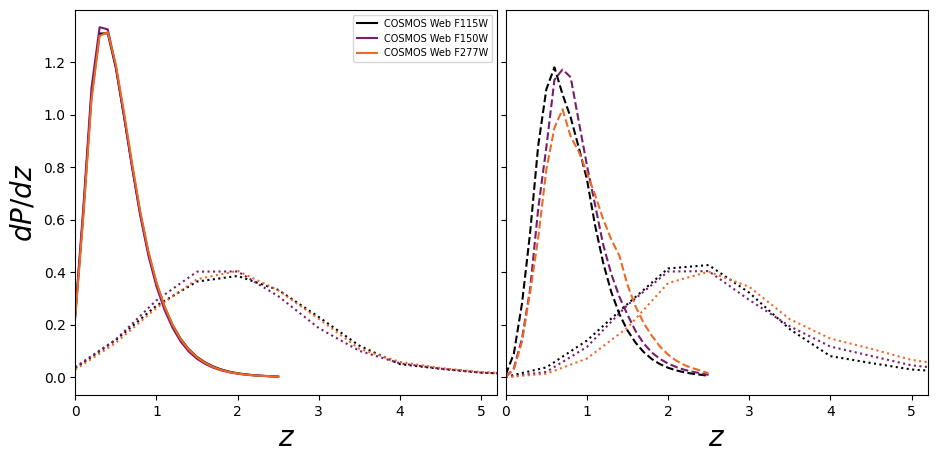

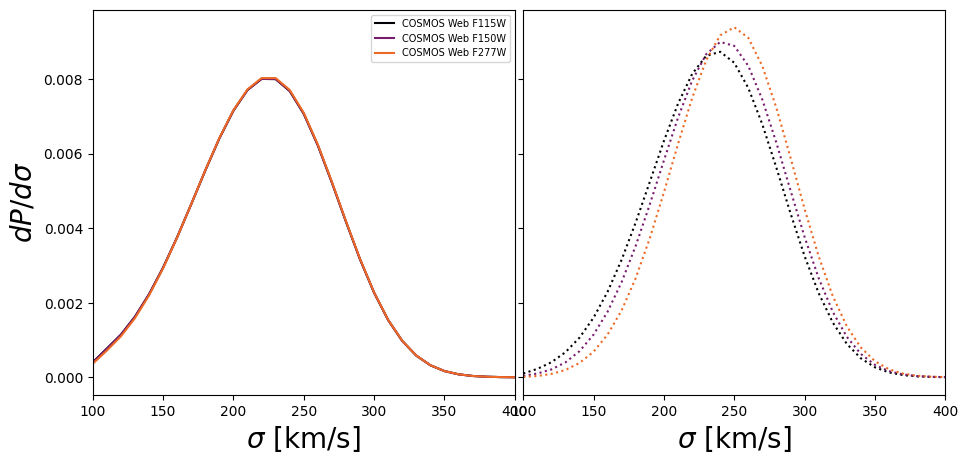

In [3]:
#surveys_selection = ['COSMOS Web F277W', 'EUCLID Wide VIS', 'DES i band', 'LSST i band']
surveys_selection = ['COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W']
#surveys_selection = surveys_titles
lens_plot.compare_z_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = 0)
lens_plot.compare_sigma_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = 0)

In [6]:
utils.print_summary_surveys(surveys_titles)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N_lenses (LL)     |

|    COSMOS Web F115W     |           0.040|          0.54|         26.8|         27.1|       78 (       39)

|    COSMOS Web F150W     |           0.050|          0.54|         26.4|         27.4|       78 (       21)

|    COSMOS Web F277W     |           0.092|          0.54|         27.0|         28.0|      145 (       23)

|    PEARLS NEP F115W     |           0.040|          0.02|         27.8|         28.8|        6 (        2)

|    PEARLS NEP F150W     |           0.050|          0.02|         27.9|         28.9|        8 (        2)

|    PEARLS NEP F277W     |           0.092|          0.02|         27.8|         28.8|        8 (        1)

|    COSMOS HST i band    |           0.120|          1.60|         25.0|         26.5|       40 (       21)

|       DES i band        |           0.960|       5000.00|         23.0|         24.7|     1537 (      769)

|SUBARU HSC

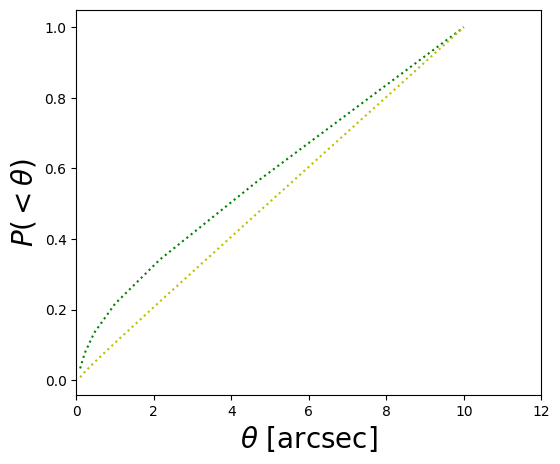

In [28]:
omg = (omega1h+omega2h)*25
t = _theta_arcsec[_theta_arcsec<25]
om = omg[_theta_arcsec<25]

RR = np.pi*(np.power(t+np.diff(t)[0],2)-np.power(t,2))#/(np.pi*10**2)
dth_r = np.diff(t)[0]
intgr = np.zeros(0)
for ith, th_r in enumerate(t[:-1]):
    xint  = np.array([th_r, th_r+dth_r])
    yint  = np.array([om[ith]*xint[0], om[ith+1]*(xint[1])])
    intgr = np.append(intgr, np.trapz(yint, xint))
CR = 2*np.pi*intgr
P_Rgalpos = np.cumsum(RR[:-1]+CR)/np.sum(RR[:-1]+CR) 
P_rnd_rnd = np.cumsum(RR[:-1])/np.sum(RR[:-1]) 

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=.15, hspace=.2)   
ax.set_ylabel(r'$P(<\theta$)', fontsize=20)
ax.set_xlabel(r'$\theta$ [arcsec]', fontsize=20)
ax.set_xlim((0,12))
ax.plot(t[:-1], P_Rgalpos, 'g:')
ax.plot(t[:-1], P_rnd_rnd, 'y:')
plt.show()

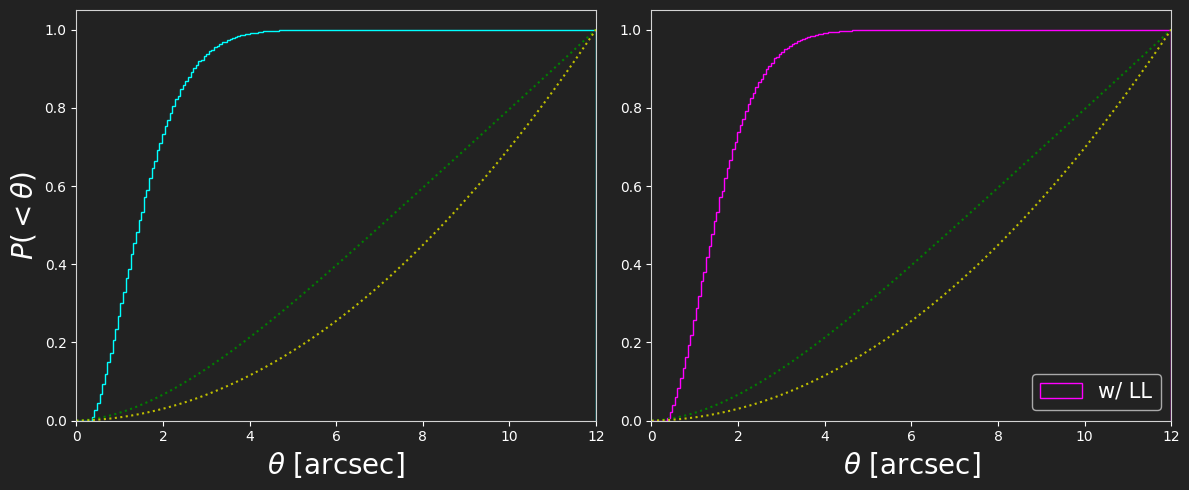

In [ ]:
lens_plot.plot_angular_separation('EUCLID Wide VIS', zs_array, SPLIT_REDSHIFTS = 0, PLOT_ACF = 1 )